# Análise de dados: Churn de clientes de banco

Projeto de machine learning para análise de dados e classificação de clientes que potencialmente poderão encerrar suas contas em um banco, os dados estão disponíveis na plataforma [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling).

O problema a ser solucionado consiste em utilizar os dados bancários dos clientes que efetuaram ou não o encerramento de suas contas para criar um modelo preditivo que irá identificar possíveis clientes que poderão ou não deixar a instituição bancária, podendo assim determinar a taxa de churn (rotatividade/perda de clientes) e com base nos perfis mapeados tomar ações para retenção dos mesmos, evitando impactos como, por exemplo, aumento de custos, queda de lucro, reputação da marca entre outros fatores sensíveis a experiência do cliente com o produto da empresa.

## Demanda da análise

- Analisar a correlação dos dados dos clientes.
- Gerar um modelo preditivo de churn por parte de um cliente.
- Simular novas entradas de dados e previsões.

## Tópicos da análise

1. Análise das medidas estatísticas dos dados
2. Distribuição dos valores da váriavel dependente (target)
3. Distribuição dos dados entre as variáveis independentes (features) e dependente (target)
4. Correlação entre as variáveis
5. Preparação dos dados para aplicação no modelo preditivo
6. Separação (treino e teste), padronização e balanceamento dos dados
7. Modelo preditivo: Regressão Logística
   1. Busca pelos melhores parâmetros e treinamento do modelo
   2. Treinamento e predições do modelo
   3. Métricas de avaliação do modelo
8. Modelo preditivo: Decision Tree
   1. Busca pelos melhores parâmetros e treinamento do modelo
   2. Treinamento e predições do modelo
   3. Métricas de avaliação do modelo
9. Modelo preditivo: Random Forest
   1. Busca pelos melhores parâmetros e treinamento do modelo
   2. Treinamento e predições do modelo
   3. Métricas de avaliação do modelo
10. Modelo preditivo: SVM (Support Vector Machine)
    1. Busca pelos melhores parâmetros e treinamento do modelo
    2. Treinamento e predições do modelo
    3. Métricas de avaliação do modelo
11.  Comparativo gráfico e de métricas
12.  Conclusão

## Dicionário de dados

**RowNumber:** Números de linha de 1 a 10.000<br>
**CustomerId:** Ids exclusivos para identificação do cliente do banco<br>
**Surname:** Sobrenome do cliente<br>
**CreditScore:** Score do cliente<br>
**Geography:** País onde o cliente reside<br>
**Gender:** Gênero, masculino ou feminino<br>
**Age:** Idade do cliente<br>
**Tenure:** Número de anos que o cliente está no banco<br>
**Balance:** Saldo bancário do cliente<br>
**NumOfProducts:** Número de produtos bancários que o cliente está utilizando<br>
**HasCrCard:** Flag para saber se o cliente possui um cartão de crédito do banco ou não<br>
**IsActiveMember:** Flag para saber se o cliente é um membro ativo do banco ou não<br>
**EstimatedSalary:** Salário estimado do cliente em dólares<br>
**Exited:** Flag, 1 se o cliente encerrou a conta no banco e 0 se o cliente permaneceu<br>


## Importação de bibliotecas


In [143]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             auc,
                             roc_curve)

from tabulate import tabulate

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## Carregamento dos dados


In [144]:
# Efetuando a limpeza de memória antes do carregamento dos dados
gc.collect()

# Caminho do arquivo de dados
path = 'dados/Churn_Modelling.csv'

# Criando um dataframe a partir do arquivo no diretório de dados
df = pd.read_csv(path, encoding='utf-8', sep=',')


## Detalhes do dataframe


In [145]:
# Informações do dataframe como nome das colunas, contagem de
# de dados, tipo de dados e quantidade de memória utilizada

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.6 MB


In [146]:
print(f'\nQuantidade de linhas (registros): {df.shape[0]}' )
print(f'\nQuantidade de colunas (variáveis): { df.shape[1]}')



Quantidade de linhas (registros): 10000

Quantidade de colunas (variáveis): 14


In [147]:
# Primeiras linhas do dataframe

df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Removendo colunas que não serão utilizadas


In [148]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


## Verificando e tratando se necessário registros duplicados


In [149]:
df.duplicated(keep='first').value_counts().to_frame()


,count
False,10000


## Verificando e tratando se necessário valores únicos


In [150]:
df.nunique().to_frame().rename(columns={0: 'Quantidade'})


,Quantidade
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


In [151]:
# Verificando a quantidade de valores únicos de coluna(s) específica(s)

def exibe_valores_unicos(coluna):
    '''
    Verifica a quantidade de valores únicos de coluna(s) específica(s)

    :param coluna: Column Dataframe
        Dataframe e coluna a ser analisado.
    '''
    coluna_qtde = pd.DataFrame(coluna.value_counts().sort_index())
    coluna_qtde = coluna_qtde.T
    print(f'\n{coluna_qtde}')

cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts']

for col in cols:
    exibe_valores_unicos(df[col])



Geography  France  Germany  Spain
count        5014     2509   2477

Gender  Female  Male
count     4543  5457

Tenure   0     1     2     3    4     5    6     7     8    9    10
count   413  1035  1048  1009  989  1012  967  1028  1025  984  490

NumOfProducts     1     2    3   4
count          5084  4590  266  60


## Verificando e tratando se necessário os tipos de valores


In [152]:
df.dtypes.to_frame().rename(columns={0: 'Tipo'})


,Tipo
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


## Verificando e tratando se necessário valores nulos


In [153]:
df.isnull().sum().to_frame().rename(columns={0: 'Quantidade'})


,Quantidade
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## Amostra de dados do dataframe


In [154]:
df.sample(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5596,597,Spain,Male,35,9,0.00,3,0,1,73181.39,1
880,749,France,Female,60,6,0.00,1,1,0,17978.68,1
7794,508,France,Female,25,2,111395.53,1,0,1,48197.06,0
2418,614,France,Male,40,6,0.00,1,1,1,20339.79,1
4385,651,France,Male,35,2,86911.80,1,1,0,174094.24,0
6737,715,Spain,Male,38,2,96798.79,2,1,1,4554.67,0
7896,635,Spain,Male,41,1,0.00,2,1,0,175611.50,0
9151,614,France,Male,49,1,0.00,2,1,0,192440.54,0
1024,718,France,Female,25,4,108691.95,1,1,0,63030.97,0
9582,559,France,Male,62,6,118756.62,1,1,1,20367.68,0


## 1. Análise das medidas estatísticas dos dados


In [155]:
# Descrição dos dados estatísticos

cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[cols].describe().T


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


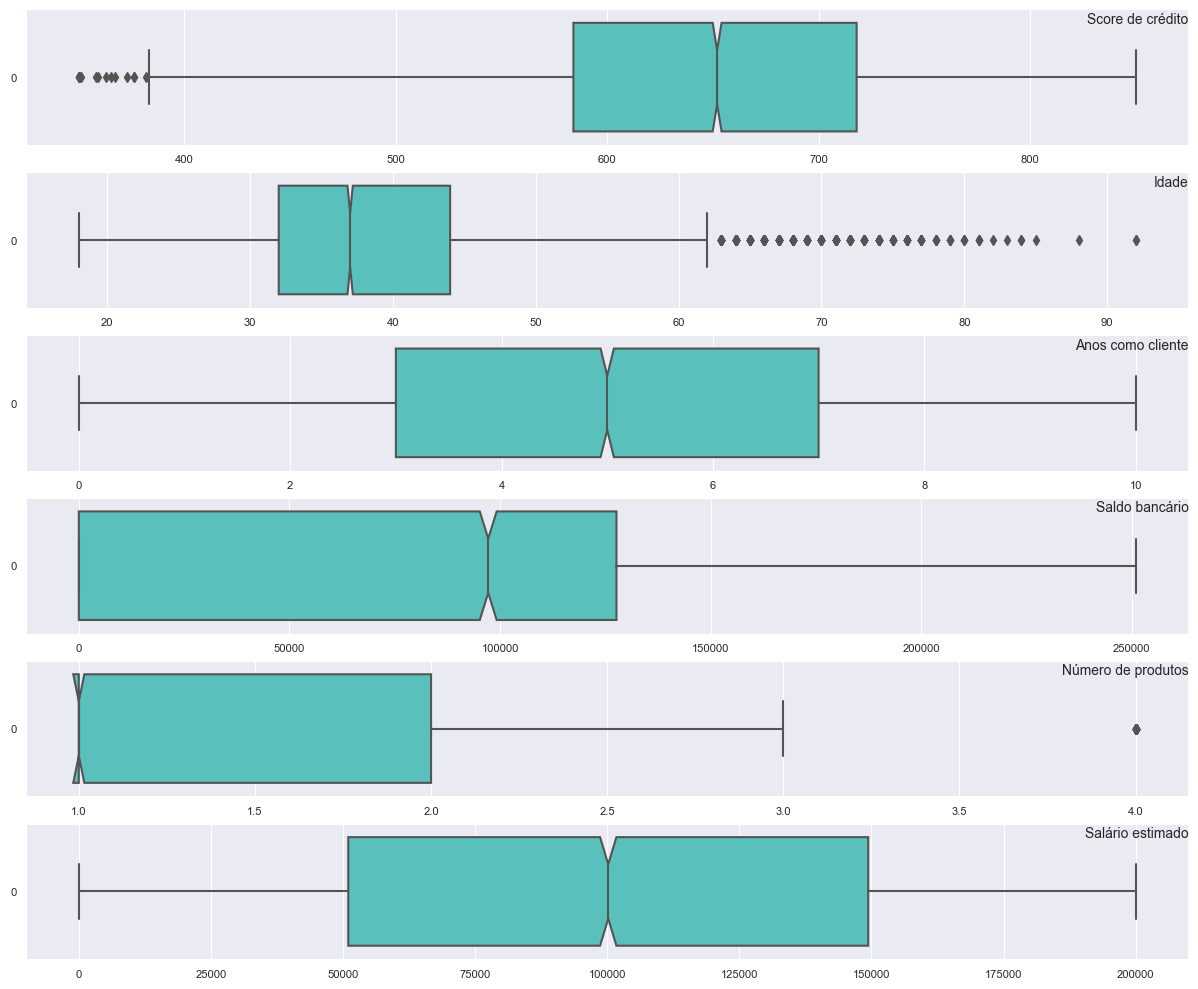

In [156]:
# Função para geração de gráficos boxplot

def graf_boxplot(coluna, ax, title):
    '''
    Verifica a quantidade de valores únicos de coluna(s) específica(s)

    :param coluna: Column Dataframe
        Dataframe e coluna a ser analisado.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    :param title: str
        Título dado ao gráfico.
    '''
    sns.boxplot(data=coluna, ax=ax, notch=True,
                orient='h', color='mediumturquoise')
    ax.set(xlabel='', ylabel='')
    ax.tick_params(labelsize=8)
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_title(title, loc='right', fontsize=10, pad=-10)


fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(
    nrows=6, ncols=1, figsize=(15, 10))

graf_boxplot(df['CreditScore'], ax1, 'Score de crédito')
graf_boxplot(df['Age'], ax2, 'Idade')
graf_boxplot(df['Tenure'], ax3, 'Anos como cliente')
graf_boxplot(df['Balance'], ax4, 'Saldo bancário')
graf_boxplot(df['NumOfProducts'], ax5, 'Número de produtos')
graf_boxplot(df['EstimatedSalary'], ax6, 'Salário estimado')

plt.subplots_adjust(top=1.9, bottom=0.95)
plt.show()


In [157]:
# Geração dos limites inferior e superior das variáveis que apresentaram outliers

cols = ['CreditScore', 'Age', 'NumOfProducts']

for col in cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ
    print(f'\n{col.upper()}')
    print(f'Limite inferior: {limite_inferior}')
    print(f'Limite superior: {limite_superior}')



CREDITSCORE
Limite inferior: 383.0
Limite superior: 919.0

AGE
Limite inferior: 14.0
Limite superior: 62.0

NUMOFPRODUCTS
Limite inferior: -0.5
Limite superior: 3.5


In [158]:
# Função para exibição dos valores únicos dos outliers

def valores_outliers (col, lim, sinal):
    '''
    Exibe os valores únicos dos outliers

    :param col: Column Dataframe
        Dataframe e coluna a ser analisado.
    :param lim: int
        Valor do limite inferior ou superior.
    :param sinal: str
        Símbolo de maior(>) ou menor(<).
    '''
    arr = np.array(df[col])
    if sinal == '>':
        val = arr[np.where(arr > lim)[0]]
    else:
        val = arr[np.where(arr < lim)[0]]
    print(f'\n{col.upper()}: {np.unique(val)}')
    
valores_outliers('CreditScore', 383, '<')
valores_outliers('Age', 62, '>')
valores_outliers('NumOfProducts', 3.5, '>')


CREDITSCORE: [350 351 358 359 363 365 367 373 376 382]

AGE: [63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88
 92]

NUMOFPRODUCTS: [4]


Algumas variáveis independentes apresentaram alguns outliers como **CreditScore** (Score de crédito) onde há pontuações abaixo de 380, aproximadamente, **Age** (Idade) com casos entre 60 e pouco mais de 90 anos e **NumOfProducts** (Número de produtos) onde há um grupo de clientes com 4 produtos bancários.
Estas situações não significam, necessariamente, que haja alguma inconsistência nos dados, mas sim que há casos que estão fora das orcorrências comuns identificadas no conjunto de dados, portanto seram mantidos.


## 2. Distribuição dos valores da váriavel dependente (target)


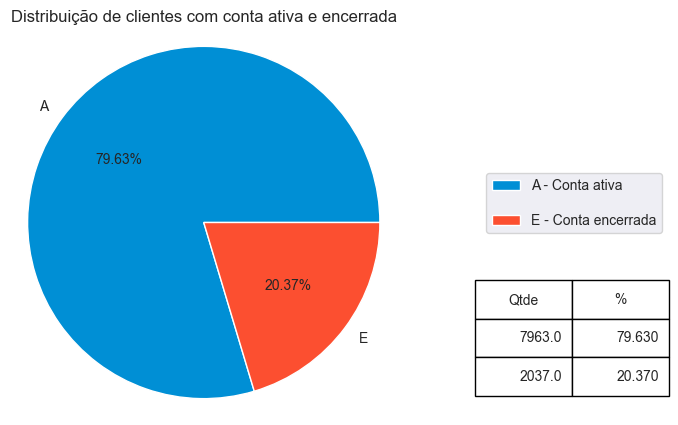

In [159]:
df_exited = df['Exited'].value_counts()
df_exited = pd.DataFrame(df_exited)
df_exited['%'] = df_exited['count'] / df_exited['count'].sum() * 100

plt.figure(figsize=(5, 5))

plt.pie(df_exited['%'], labels=['A', 'E'], colors=[
        '#008fd5', '#fc4f30'], autopct='%0.2f%%')
plt.legend(loc='right', labels=['A - Conta ativa', 'E - Conta encerrada'],
           labelspacing=1.5, bbox_to_anchor=(1.1, 0.1, 0.6, 0.9))
plt.title('Distribuição de clientes com conta ativa e encerrada')

cell_text = []
for row in range(len(df_exited)):
    cell_text.append(df_exited.iloc[row])
table = plt.table(cellText=cell_text, colLabels=['Qtde', '%'],
                  loc='bottom right', bbox=(1.2, 0.05, 0.5, 0.3))
table.auto_set_font_size(False)
table.set_fontsize(10)
for cell in table._cells:
    if cell == (2, 1) or cell == (1, 1):
        cell_text = table._cells[cell].get_text().get_text()
        table._cells[cell].get_text().set_text(f'{float(cell_text):.3f}')
plt.axis('equal')
plt.show()


Embora seja comum clientes fecharem contas bancárias, o atual percentual de **20,37%** de perda de clientes (_2037 contas_) é um índice muito alto, observando o gráfico está se aproximando de 1/4 do total de contas que o banco já administrou.


## 3. Distribuição dos dados entre as variáveis independentes (features) e dependente (target)


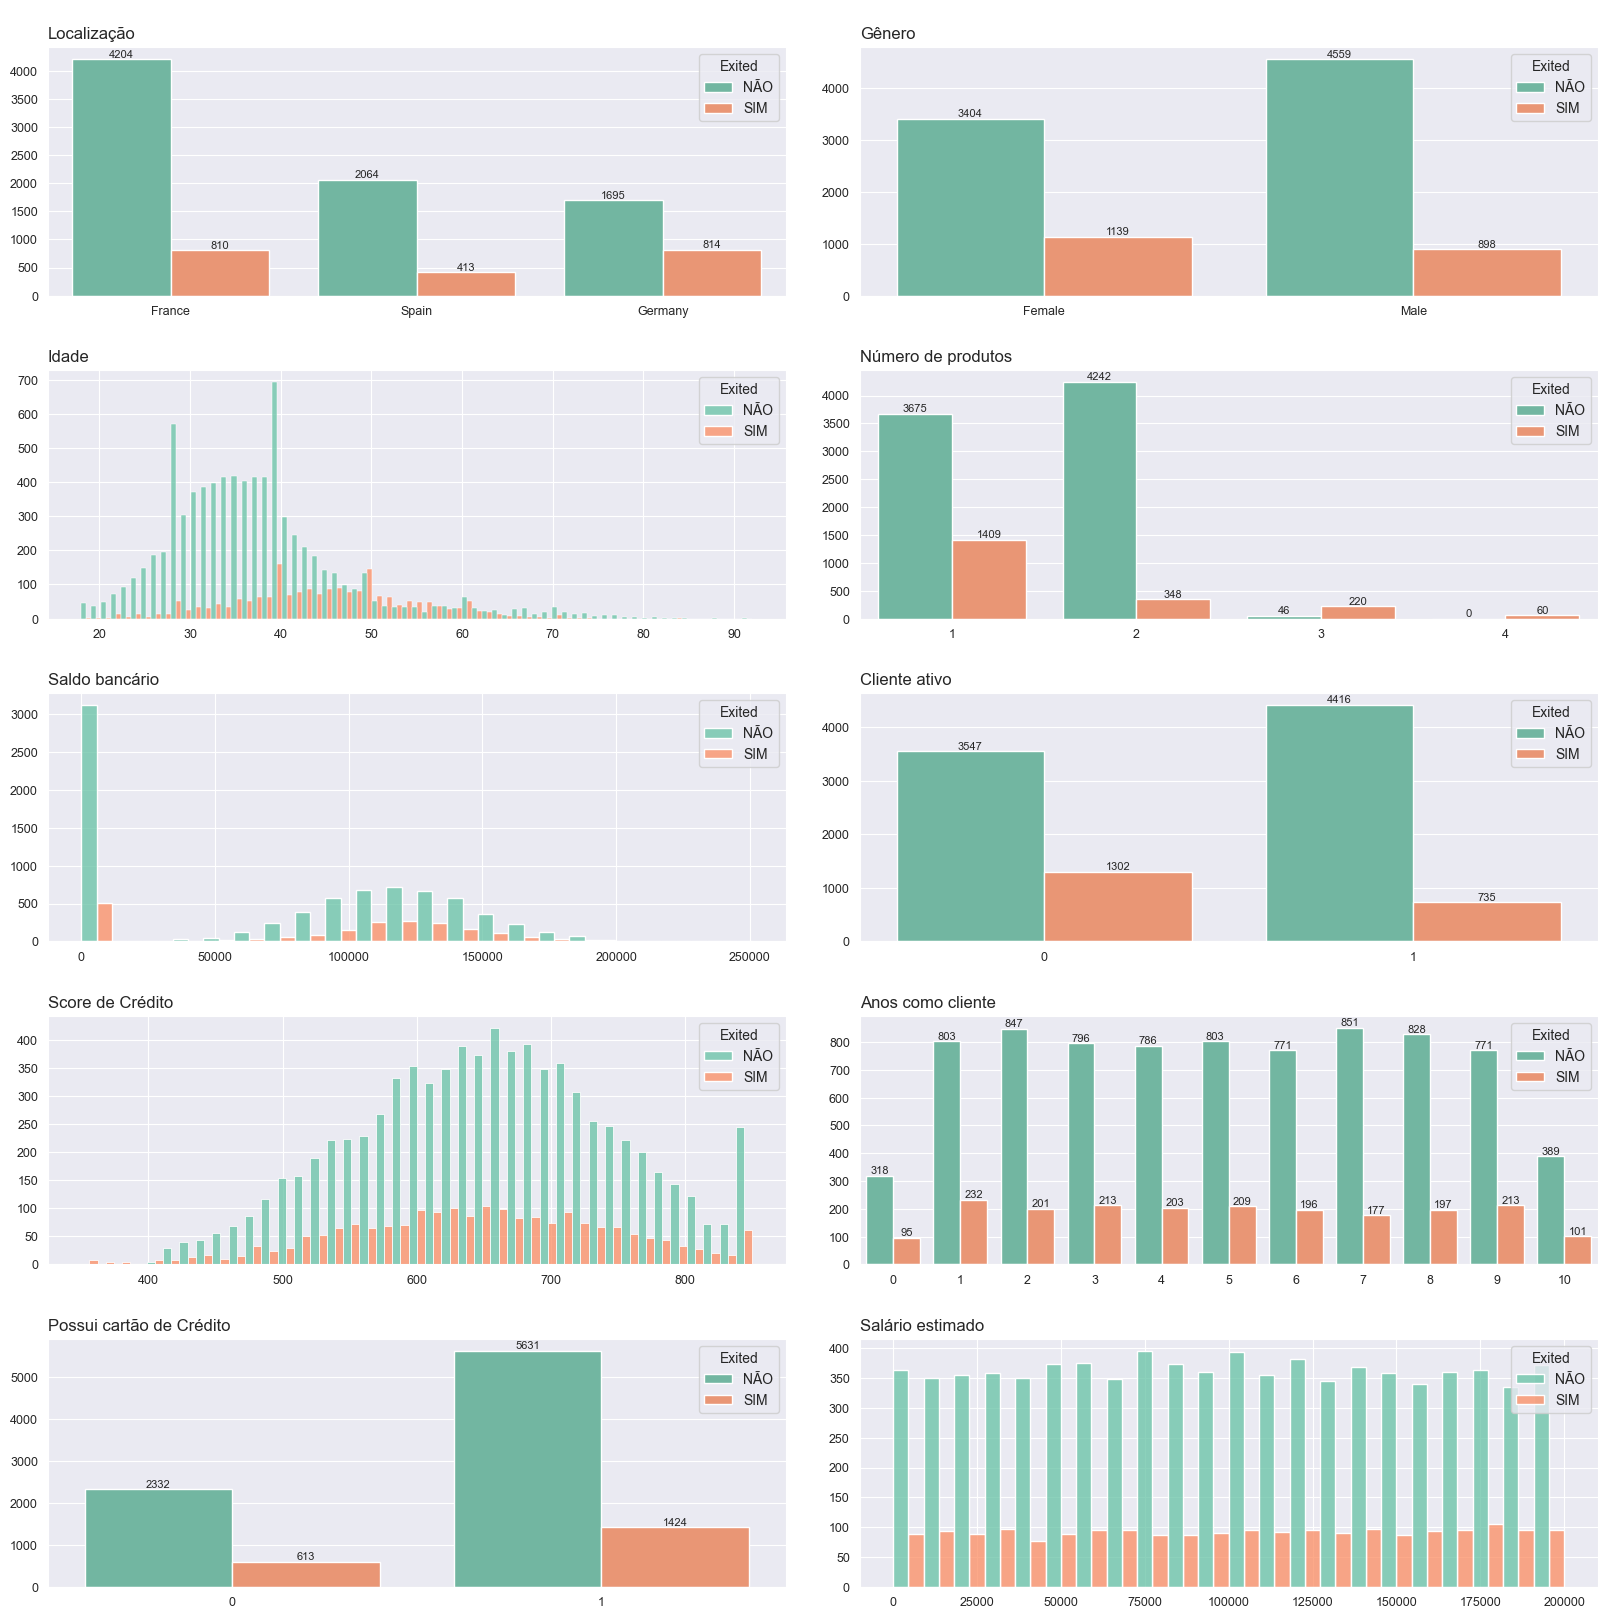

In [160]:
# Funções para gerar gráficos histplot e countplot

saida = df['Exited'].replace({0: 'NÃO', 1: 'SIM'})
hue_order = ['NÃO', 'SIM']


def graf_countplot(df, x, title, ax):
    '''
    Função para gerar gráficos countplot

    :param df: Dataframe
        Nome do dataframe.
    :param x: str
        Nome da coluna do dataframe.
    :param title: str
        Título dado ao gráfico.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    '''
    ax = sns.countplot(data=df, x=x, hue=saida, ax=ax,
                       hue_order=hue_order, palette='Set2')
    for container in ax.containers:
        ax.bar_label(container, size=8)
    ax.set(xlabel='', ylabel='')
    ax.set_title(title, loc='left')
    ax.tick_params(labelsize=9)


def graf_histplot(df, x, title, ax):
    '''
    Função para gerar gráficos histplot

    :param df: Dataframe
        Nome do dataframe.
    :param x: str
        Nome da coluna do dataframe.
    :param title: str
        Título dado ao gráfico.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    '''
    ax = sns.histplot(data=df, x=x, hue=saida, ax=ax,
                      hue_order=hue_order,  palette='Set2', multiple='dodge')
    ax.set(xlabel='', ylabel='')
    ax.set_title(title, loc='left')
    ax.tick_params(labelsize=9)


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),
      (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(20, 20))


graf_countplot(df, 'Geography', '\nLocalização', ax1)
graf_countplot(df, 'Gender', '\nGênero', ax2)
graf_histplot(df, 'Age', '\nIdade', ax3)
graf_countplot(df, 'NumOfProducts', '\nNúmero de produtos', ax4)
graf_histplot(df, 'Balance', '\nSaldo bancário', ax5)
graf_countplot(df, 'IsActiveMember', '\nCliente ativo', ax6)
graf_histplot(df, 'CreditScore', '\nScore de Crédito', ax7)
graf_countplot(df, 'Tenure', '\nAnos como cliente', ax8)
graf_countplot(df, 'HasCrCard', '\nPossui cartão de Crédito', ax9)
graf_histplot(df, 'EstimatedSalary', '\nSalário estimado', ax10)

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()


- A localização dos clientes que mais encerraram suas contas está mais concentrada na França (France) e Alemanha (Germany), sendo que visualmente há quase um empate na quantidade, destaque que se comparado aos clientes que mantiveram a conta a Alemanha é o país onde mais estão ocorrendo perdas de clientes.<br>
- Os clientes do gênero feminino são os que mais fecharam suas contas, fica mais evidente quando comparado aos clientes que se mantiveram.<br>
- Por idade, clientes com 40 e 50 anos aproximadamente são os que mais encerraram suas contas diferente dos que a mantiveram com idades de 28 e 40 anos aproximadamente.<br>
- Geralmente clientes que possuem um único produto contratado são os que mais fecharam suas contas sendo que a maioria que manteve conta no banco possuem dois ou somente um produto contratado.<br>
- Clientes sem saldo bancário possuem uma grande representação no volume de clientes, sendo estes os que mais encerraram suas contas.<br>
- Clientes que não movimentaram suas contas, não ativos, são os que mais fecharam suas contas bancárias.<br>
- Nos gráficos de Score de Crédito, Anos como cliente, Possui cartão de Crédito e Salário estimado, a quantidade de clientes que encerraram a conta, visualmente, segue em proporções semelhantes aos que mantiveram a conta.


## 4. Correlação entre as variáveis


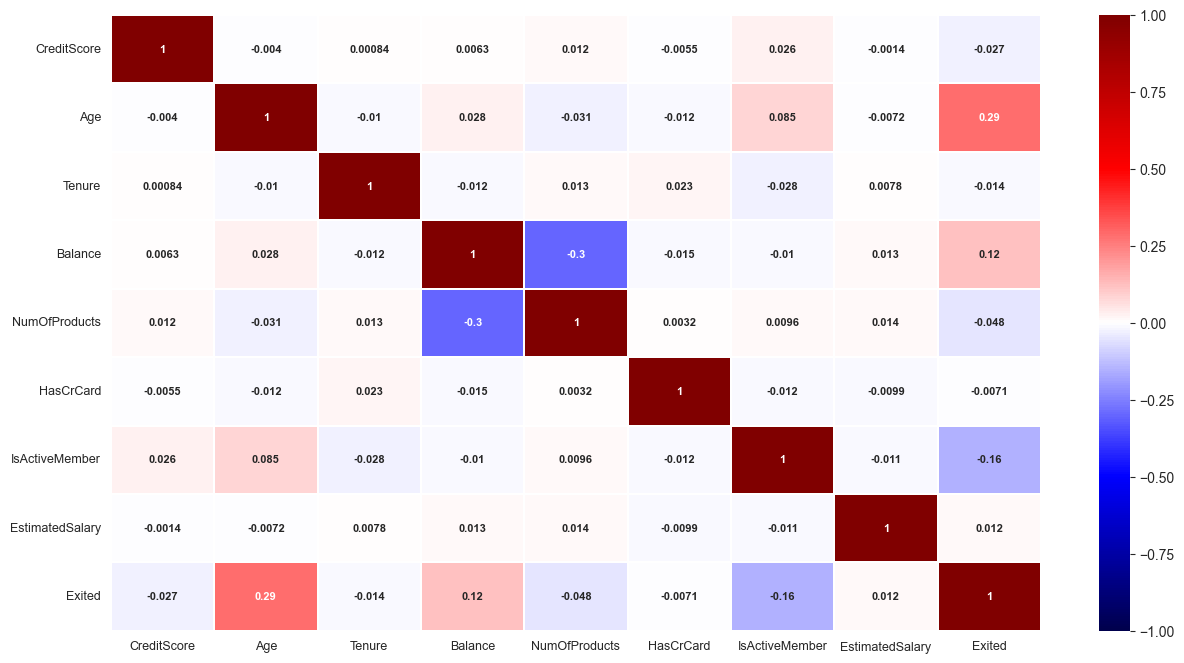

In [161]:
corr = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
           'IsActiveMember', 'EstimatedSalary', 'Exited']].corr(method='pearson')

plt.figure(figsize=(15, 8))
plot = sns.heatmap(data=corr, cmap='seismic', vmin=-1, linewidths=.2,
                   annot=True, annot_kws={'size': 8, 'fontweight': 'bold'})
plot.tick_params(labelsize=9)


A análise de correlação entre as **variáveis independentes** e a **variável target** (_Exited_) não identificou correlações fortemente significativas, positivas ou negativas. No entanto, é importante destacar que a falta de correlação forte não implica necessariamente que as variáveis não sejam importantes para a análise e elaboração de um modelo preditivo.

## 5. Preparação dos dados para aplicação no modelo preditivo

In [162]:
# Agrupar os pontos de score em faixas de pontuação

# very_low - de 0 a 300 pontos
# low - de 301 a 500 pontos
# good - de 501 a 700 pontos
# excellent - de 701 a 1000 pontos

faixa = [0, 301, 501, 701, df['CreditScore'].max()]
rotulos = ['very_low',
           'low',
           'good',
           'excellent']

df['CreditScore'] = pd.cut(df['CreditScore'], bins=faixa, labels=rotulos)
df = pd.DataFrame(df)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,good,France,Female,42,2,0.00,1,1,1,101348.88,1
1,good,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,good,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,good,France,Female,39,1,0.00,2,0,0,93826.63,0
4,excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [163]:
# Agrupar idades numéricas em faixas etárias

# 18_24 - de 18 a 24 anos
# 25_34 - de 25 a 34 anos
# 35_44 - de 35 a 44 anos
# 45_54 - de 45 a 54 anos
# 55_64 - de 55 a 64 anos
# 65_More - maior ou igual a 65 anos

faixa = [17, 25, 35, 45, 55, 65, df['Age'].max()]
rotulos = ['18_24',
           '25_34',
           '35_44',
           '45_54',
           '55_64',
           '65_More']

df['Age'] = pd.cut(df['Age'], bins=faixa, labels=rotulos)
df = pd.DataFrame(df)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,good,France,Female,35_44,2,0.00,1,1,1,101348.88,1
1,good,Spain,Female,35_44,1,83807.86,1,0,1,112542.58,0
2,good,France,Female,35_44,8,159660.80,3,1,0,113931.57,1
3,good,France,Female,35_44,1,0.00,2,0,0,93826.63,0
4,excellent,Spain,Female,35_44,2,125510.82,1,1,1,79084.10,0


In [164]:
# Converter os saldos bancários em categorias

# 1 - se há saldo bancário
# 0 - se não há saldo bancário

maior_que_zero = lambda k: 1 if k > 0 else 0

df['Balance'] = df['Balance'].map(maior_que_zero)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,good,France,Female,35_44,2,0,1,1,1,101348.88,1
1,good,Spain,Female,35_44,1,1,1,0,1,112542.58,0
2,good,France,Female,35_44,8,1,3,1,0,113931.57,1
3,good,France,Female,35_44,1,0,2,0,0,93826.63,0
4,excellent,Spain,Female,35_44,2,1,1,1,1,79084.10,0


In [165]:
# Converter as quantidades de produtos em categorias

# 1_Product - possui 1 produto
# 2_Products - possui 2 produtos
# 3_MoreProducts - possui 3 ou mais produtos

dict = {'1': '1_Product', '2': '2_Products',
        '3': '3_MoreProducts', '4': '3_MoreProducts'}

for k in dict:
    df['NumOfProducts'] = [str(num).replace(k, dict[k])
                           for num in df['NumOfProducts']]

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,good,France,Female,35_44,2,0,1_Product,1,1,101348.88,1
1,good,Spain,Female,35_44,1,1,1_Product,0,1,112542.58,0
2,good,France,Female,35_44,8,1,3_MoreProducts,1,0,113931.57,1
3,good,France,Female,35_44,1,0,2_Products,0,0,93826.63,0
4,excellent,Spain,Female,35_44,2,1,1_Product,1,1,79084.10,0


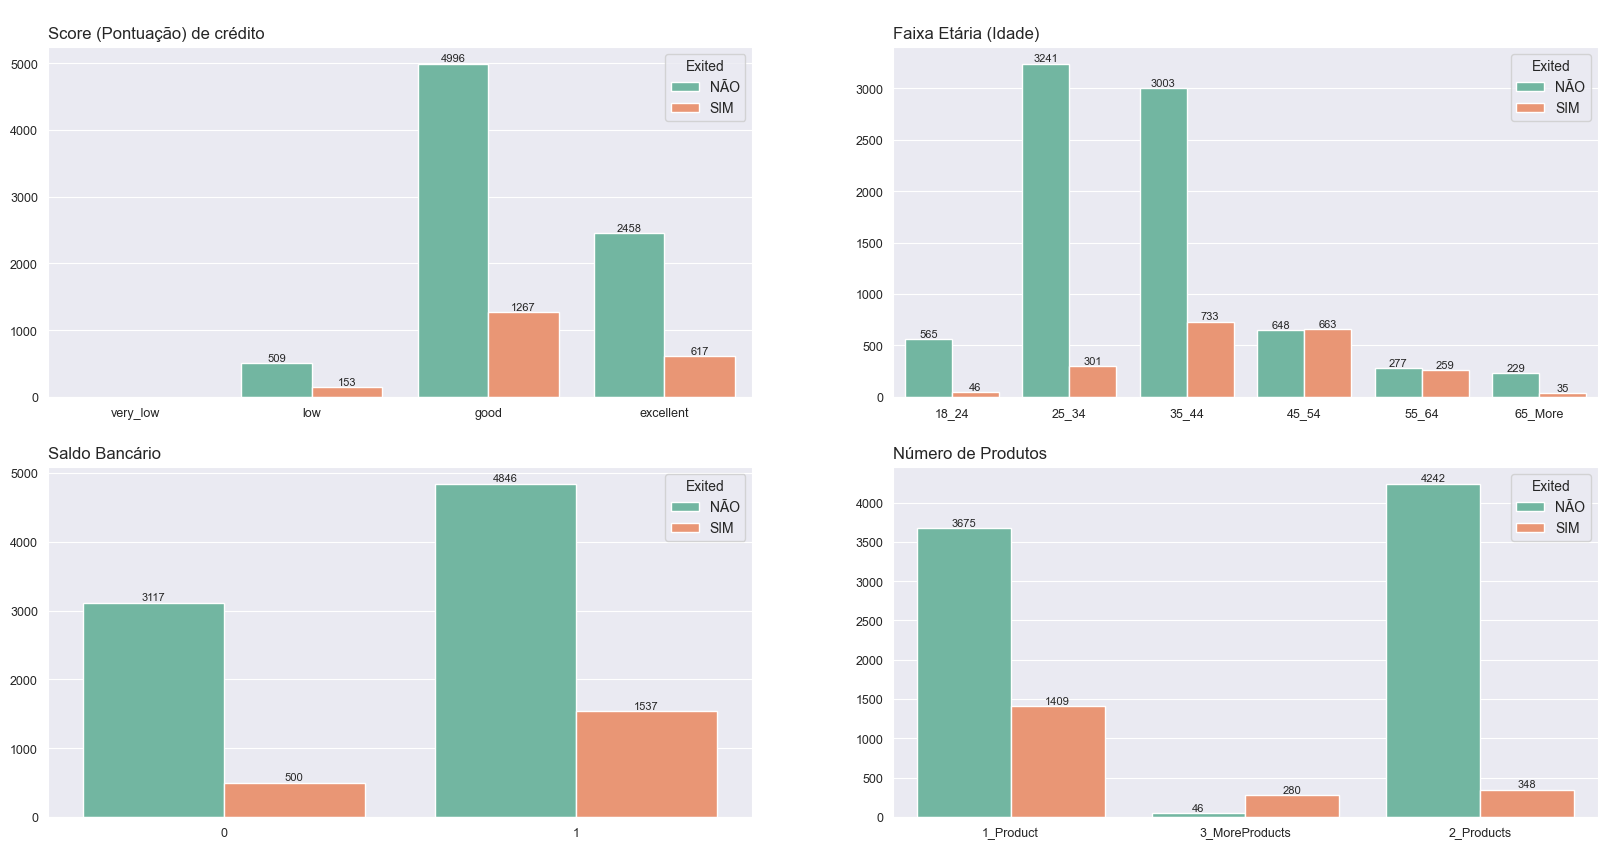

In [166]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

graf_countplot(df, 'CreditScore', '\nScore (Pontuação) de crédito', ax1)
graf_countplot(df, 'Age', '\nFaixa Etária (Idade)', ax2)
graf_countplot(df, 'Balance', '\nSaldo Bancário', ax3)
graf_countplot(df, 'NumOfProducts', '\nNúmero de Produtos', ax4)

Variáveis como **CreditScore** (Pontuação de crédito), **Age** (Idade), **Balance** (Saldo bancário) e NumOfProducts (Número de produtos) apresentavam outliers, alguma ausência ou pouca variabilidade e representatividade nos seus dados, sendo assim, **CreditScore** que algumas pontuações eram consideradas outliers e **Age** que não contemplava todas as idades numéricas possíveis a partir dos 18 anos foram feitos agrupamentos por faixas de pontuação e faixas etárias respectivamente, **Balance** em que valores do saldo bancário foram convertidos em 0 (_zero_) que são contas vazias e 1 (_um_) que possuem algum saldo e **NumOfProducts** que inicialmente contia até 4 produtos e foram transformados em 3 categorias que representam 1 produto, 2 produtos e 3 ou mais produtos.

In [167]:
# Transformando valores de colunas expecificas em novas e distintas categorias

def transforme_onehotenconder(col, col_name, df):
    '''
    Função para transformando dos valores de colunas expecificas em categorias distintas

    :param col: Column Dataframe
        Dataframe e coluna a ser transformada.
    :param col_name: str
        Nome da coluna a ser transformada.        
    :param names: list
        Lista com nomes para nomeação das colunas transformadas.
    :param df: Dataframe
        Nome do dataframe.
    return df: Dataframe
        Dataframe com as colunas transformadas.
    '''
    ohe = OneHotEncoder().fit_transform(col.values.reshape(-1, 1)).toarray()
    names = OneHotEncoder().fit(col.values.reshape(-1, 1)
                                ).get_feature_names_out([col_name])
    df_ohe = pd.DataFrame(ohe, columns=names)
    df = pd.concat([df, df_ohe], axis=1)
    return df


def transforme_labelenconder(col, name):
    '''
    Função para transformando dos valores de colunas expecificas em categorias distintas

    :param col: Column Dataframe
        Dataframe e coluna a ser transformada.
    :param name: str
        Nome da nova coluna do dataframe.
    return df: Dataframe
        Dataframe com as colunas transformadas.
    '''
    df[name] = LabelEncoder().fit_transform(col)
    return df


df = transforme_onehotenconder(df['CreditScore'], 'Score', df)
df = transforme_onehotenconder(df['Geography'], 'Geo', df)
df = transforme_onehotenconder(df['NumOfProducts'], 'Num', df)
df = transforme_onehotenconder(df['Age'], 'Age', df)
df = transforme_labelenconder(df['Gender'], 'Gender')

pd.set_option('display.max_columns', 26)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Score_excellent,Score_good,Score_low,Geo_France,Geo_Germany,Geo_Spain,Num_1_Product,Num_2_Products,Num_3_MoreProducts,Age_18_24,Age_25_34,Age_35_44,Age_45_54,Age_55_64,Age_65_More
0,good,France,0,35_44,2,0,1_Product,1,1,101348.88,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,good,Spain,0,35_44,1,1,1_Product,0,1,112542.58,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,good,France,0,35_44,8,1,3_MoreProducts,1,0,113931.57,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,good,France,0,35_44,1,0,2_Products,0,0,93826.63,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,excellent,Spain,0,35_44,2,1,1_Product,1,1,79084.10,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


As variáveis categóricas **CreditScore** (Pontuação de crédito), **Geography** (Localização), **Age** (Faixa etária) e **NumOfProducts** (Número de produtos) foram utilizadas para a criação variáveis binárias, cada uma se tornou uma categoria distinta, no caso de **Gender** (Gênero) suas duas categorias foram convertidas em 0 e 1 passando a ser uma variável binária.

## 6. Padronização e separação (treino e teste) dos dados 

In [168]:
# Separação dos dados de treino e teste

# Features, variáveis independentes
X = df.drop(['CreditScore', 'Geography', 'Age',
            'NumOfProducts', 'Exited'], axis=1)

# Padronizando os dados das features
std = StandardScaler().fit(X)
X = std.transform(X)

# Target, variável dependente
y = df['Exited'].copy()

# Definindo o percentual de dados para teste
perc = 0.2

# Definindo o random_state
seed = 42

# Separação dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=perc, random_state=seed)

print('\nQuantidade de dados divididos em treino e teste\n')
dict = {
    '': ['Treino', 'Teste'],
    'X': [X_train.shape, X_test.shape],
    'y': [y_train.shape, y_test.shape]
}

print(tabulate(dict, headers='keys', tablefmt='fancy_grid'))



Quantidade de dados divididos em treino e teste

╒════════╤════════════╤═════════╕
│        │ X          │ y       │
╞════════╪════════════╪═════════╡
│ Treino │ (8000, 21) │ (8000,) │
├────────┼────────────┼─────────┤
│ Teste  │ (2000, 21) │ (2000,) │
╘════════╧════════════╧═════════╛


## 7. Modelo preditivo: Regressão Logística

### 1. Busca pelos melhores parâmetros e treinamento do modelo

In [169]:
def busca_parametros(estimator, scoring, params, cv=5, verbose=1):
    '''
    Função para efetuar a busca dos melhores parâmetros

    :param estimator: str
        Estimador que será usado para treinar o modelo.
    :param scoring: str
        Métrica utilizada para avaliação do modelo.
    :param param_grid: dict
        Dicionário com uma combinação de valores de hiperparâmetros a serem testados. 
    :param cv: int, default=5
        Número de 'folds' de divisão dos dados na validação cruzada.
    :param verbose: int, default=1
        Detalhes das mensagens impressas pela função.
    return:
        Objeto com os melhores parâmetros.
    '''
    return RandomizedSearchCV(estimator=estimator, scoring=scoring,
                              param_distributions=params, cv=cv, verbose=verbose)


# Definindo o dicionário de parâmetros de regressão logística
params = {
    'C': np.logspace(-1, 1),
    'class_weight': ['balanced'],
    'penalty': ['l1', 'l2'],
    'random_state': [42],
    'solver': ['saga', 'lbfgs'],
}

# Efetuando a busca pelos melhores parâmetros
search_cv_lr = busca_parametros(LogisticRegression(), 'recall', params)

# Treinamento do modelo
search_cv_lr.fit(X_train, y_train)


print('\nMelhores parâmetros\n')

for k, v in search_cv_lr.best_params_.items():
    print(f'{k} : {v}')

best_params = search_cv_lr.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Melhores parâmetros

solver : saga
random_state : 42
penalty : l2
class_weight : balanced
C : 3.2374575428176433


### 2. Treinamento e predições do modelo

In [170]:
# Definição do modelo de regressão logística com os melhores parâmetros
logreg = LogisticRegression(**best_params)

# Treinamento do modelo
logreg.fit(X_train, y_train)

# Predição com os dados de teste
pred = logreg.predict(X_test)

### 3. Métricas de avaliação do modelo

In [171]:
def matriz_confusao(y_test, pred):
    '''
    Função para geração de visualização tabular da matriz de confusão

    :param y_test: série - pandas
        Série de dados de teste da variável target
    :param pred: array - numpy
        Array de dados previstos pelo modelo
    '''
    matrix = confusion_matrix(y_test, pred)
    arr = matrix.T
    dict = {
        '': ['0', '1'],
        '0': [i for i in arr[0]],
        '1': [i for i in arr[1]]
    }
    print('\nMatriz de confusão')
    print(tabulate(dict, headers='keys', tablefmt='fancy_grid'))

# Matriz de confusão, irá demonstrar visualmente as quantidades de
# previsões verdadeiras e que o modelo também identificou dessa forma
# os verdadeiros positivos (VP) e os verdadeiros negativos (VN) e
# também as previsões erradas, falsos positivos (FP) e negativos (FN).
# No caso de churn 1 = saída do banco e 0 = pemanência no banco

# ╒════╤══════╤═════╕
# │    │    0 │   1 │
# ╞════╪══════╪═════╡
# │  0 │  VP  │  FP │
# ├────┼──────┼─────┤
# │  1 │  FN  │  VN │
# ╘════╧══════╧═════╛


matriz_confusao(y_test, pred)



Matriz de confusão
╒════╤══════╤═════╕
│    │    0 │   1 │
╞════╪══════╪═════╡
│  0 │ 1243 │ 364 │
├────┼──────┼─────┤
│  1 │   88 │ 305 │
╘════╧══════╧═════╛


In [172]:
def pontuacao_modelo(y_test, pred):
    '''
    Função para geração da pontuação das métricas: Accuracy, Precision, Recall e F1-score

    :param y_test: série - pandas
        Série de dados de teste da variável target
    :param pred: array - numpy
        Array de dados previstos pelo modelo
    :return: dict
        Dicionário com a pontuação das métricas do modelo
    '''    
    dict = {
        'Accuracy': [round(accuracy_score(y_test, pred)*100, 3)],
        'Precision': [round(precision_score(y_test, pred)*100, 3)],
        'Recall': [round(recall_score(y_test, pred)*100, 3)],
        'F1-score': [round(f1_score(y_test, pred)*100, 3)],
    }

    return dict

# - Accuracy (Acurácia): percentual de predições corretas em relação ao total de
#   predições feitas pelo modelo.
# - Precision (Precisão): percentual de acerto ao classificar uma predição em verdadeira
#   positiva em relação as predições verdadeiras e falsas positivas.
# - Recall (Sensibilidade ou Revocação): percentual de acerto ao classificar uma predição
#   em verdadeira positiva em relação as predições verdadeiras positivas e falsas negativas.
# - F1-score: média harmônica entre 'precision' e 'recall', fornecendo uma visão geral
#   do desempenho do modelo.


logreg_metrics = pontuacao_modelo(y_test, pred)

print(tabulate(logreg_metrics, headers='keys', tablefmt='fancy_grid'))


╒════════════╤═════════════╤══════════╤════════════╕
│   Accuracy │   Precision │   Recall │   F1-score │
╞════════════╪═════════════╪══════════╪════════════╡
│       77.4 │       45.59 │   77.608 │     57.439 │
╘════════════╧═════════════╧══════════╧════════════╛


## 8. Modelo preditivo: Decision Tree

### 1. Busca pelos melhores parâmetros e treinamento do modelo

In [173]:
# Definindo o dicionário de parâmetros de decision tree
params = {
    'class_weight': ['balanced'],
    'criterion': ['entropy'],
    'max_depth': np.arange(6, 9),
    'max_features': ['auto', None],
    'random_state': [42],
    'splitter': ['best', 'random'],
}

# Efetuando a busca pelos melhores parâmetros
search_cv_dt = busca_parametros(DecisionTreeClassifier(), 'recall', params)

# Treinamento do modelo
search_cv_dt.fit(X_train, y_train)


print('\nMelhores parâmetros\n')

for k, v in search_cv_dt.best_params_.items():
    print(f'{k} : {v}')

best_params = search_cv_dt.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits



Melhores parâmetros

splitter : best
random_state : 42
max_features : None
max_depth : 8
criterion : entropy
class_weight : balanced


### 2. Treinamento e predições do modelo

In [174]:
# Definição do modelo de decision tree com os melhores parâmetros
dtree = DecisionTreeClassifier(**best_params)

# Treinamento do modelo
dtree.fit(X_train, y_train)

# Predição com os dados de teste
pred = dtree.predict(X_test)

### 3. Métricas de avaliação do modelo

In [175]:
# Matriz de confusão, irá demonstrar visualmente as quantidades de
# previsões verdadeiras e que o modelo também identificou dessa forma
# os verdadeiros positivos (VP) e os verdadeiros negativos (VN) e
# também as previsões erradas, falsos positivos (FP) e negativos (FN).
# No caso de churn 1 = saída do banco e 0 = pemanência no banco

# ╒════╤══════╤═════╕
# │    │    0 │   1 │
# ╞════╪══════╪═════╡
# │  0 │  VP  │  FP │
# ├────┼──────┼─────┤
# │  1 │  FN  │  VN │
# ╘════╧══════╧═════╛

matriz_confusao(y_test, pred)


Matriz de confusão
╒════╤══════╤═════╕
│    │    0 │   1 │
╞════╪══════╪═════╡
│  0 │ 1240 │ 367 │
├────┼──────┼─────┤
│  1 │   99 │ 294 │
╘════╧══════╧═════╛


In [176]:
# - Accuracy (Acurácia): percentual de predições corretas em relação ao total de
#   predições feitas pelo modelo.
# - Precision (Precisão): percentual de acerto ao classificar uma predição em verdadeira
#   positiva em relação as predições verdadeiras e falsas positivas.
# - Recall (Sensibilidade ou Revocação): percentual de acerto ao classificar uma predição
#   em verdadeira positiva em relação as predições verdadeiras positivas e falsas negativas.
# - F1-score: média harmônica entre 'precision' e 'recall', fornecendo uma visão geral
#   do desempenho do modelo.

dt_metrics = pontuacao_modelo(y_test, pred)

print(tabulate(dt_metrics, headers='keys', tablefmt='fancy_grid'))

╒════════════╤═════════════╤══════════╤════════════╕
│   Accuracy │   Precision │   Recall │   F1-score │
╞════════════╪═════════════╪══════════╪════════════╡
│       76.7 │      44.478 │   74.809 │     55.787 │
╘════════════╧═════════════╧══════════╧════════════╛


## 9. Modelo preditivo: Random Forest

### 1. Busca pelos melhores parâmetros e treinamento do modelo

In [177]:
# Definindo o dicionário de parâmetros de random forest
params = {
    'class_weight': ['balanced'],
    'criterion': ['gini'],
    'max_depth': np.arange(4, 9),
    'max_features': ['auto'],
    'n_estimators': np.arange(40, 91, 10),
    'random_state': [42],
}

# Efetuando a busca pelos melhores parâmetros
search_cv_rfc = busca_parametros(
    RandomForestClassifier(), 'recall', params)

# Treinamento do modelo
search_cv_rfc.fit(X_train, y_train)


print('\nMelhores parâmetros\n')

for k, v in search_cv_rfc.best_params_.items():
    print(f'{k} : {v}')

best_params = search_cv_rfc.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits



Melhores parâmetros

random_state : 42
n_estimators : 70
max_features : auto
max_depth : 4
criterion : gini
class_weight : balanced


### 2. Treinamento e predições do modelo

In [178]:
# Definição do modelo de random forest com os melhores parâmetros
randomforest = RandomForestClassifier(**best_params)

# Treinamento do modelo
randomforest.fit(X_train, y_train)

# Predição com os dados de teste
pred = randomforest.predict(X_test)

### 3. Métricas de avaliação do modelo

In [179]:
# Matriz de confusão, irá demonstrar visualmente as quantidades de
# previsões verdadeiras e que o modelo também identificou dessa forma
# os verdadeiros positivos (VP) e os verdadeiros negativos (VN) e
# também as previsões erradas, falsos positivos (FP) e negativos (FN).
# No caso de churn 1 = saída do banco e 0 = pemanência no banco

# ╒════╤══════╤═════╕
# │    │    0 │   1 │
# ╞════╪══════╪═════╡
# │  0 │  VP  │  FP │
# ├────┼──────┼─────┤
# │  1 │  FN  │  VN │
# ╘════╧══════╧═════╛

matriz_confusao(y_test, pred)


Matriz de confusão
╒════╤══════╤═════╕
│    │    0 │   1 │
╞════╪══════╪═════╡
│  0 │ 1196 │ 411 │
├────┼──────┼─────┤
│  1 │   88 │ 305 │
╘════╧══════╧═════╛


In [180]:
# - Accuracy (Acurácia): percentual de predições corretas em relação ao total de
#   predições feitas pelo modelo.
# - Precision (Precisão): percentual de acerto ao classificar uma predição em verdadeira
#   positiva em relação as predições verdadeiras e falsas positivas.
# - Recall (Sensibilidade ou Revocação): percentual de acerto ao classificar uma predição
#   em verdadeira positiva em relação as predições verdadeiras positivas e falsas negativas.
# - F1-score: média harmônica entre 'precision' e 'recall', fornecendo uma visão geral
#   do desempenho do modelo.

rf_metrics = pontuacao_modelo(y_test, pred)

print(tabulate(rf_metrics, headers='keys', tablefmt='fancy_grid'))

╒════════════╤═════════════╤══════════╤════════════╕
│   Accuracy │   Precision │   Recall │   F1-score │
╞════════════╪═════════════╪══════════╪════════════╡
│      75.05 │      42.598 │   77.608 │     55.005 │
╘════════════╧═════════════╧══════════╧════════════╛


## 10. Modelo preditivo: SVM (Support Vector Machine)

### 1. Busca pelos melhores parâmetros e treinamento do modelo

In [181]:
# Definindo o dicionário de parâmetros de SVM
params = {
    'C': np.arange(4.2, 4.3, 0.02),
    'coef0': np.arange(0.2012, 0.2013, 0.0002),
    'degree': [1],
    'gamma': np.arange(0.20198, 0.202, 0.00002),
    'kernel': ['poly'],
    'random_state': [42],
    'class_weight': ['balanced'],
}


# Efetuando a busca pelos melhores parâmetros
search_cv_svc = busca_parametros(SVC(), 'recall', params)

# Treinamento do modelo
search_cv_svc.fit(X_train, y_train)


print('\nMelhores parâmetros\n')

for k, v in search_cv_svc.best_params_.items():
    print(f'{k} : {v}')

best_params = search_cv_svc.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits



Melhores parâmetros

random_state : 42
kernel : poly
gamma : 0.20199999999999999
degree : 1
coef0 : 0.2012
class_weight : balanced
C : 4.239999999999999


### 2. Treinamento e predições do modelo

In [182]:
# Definição do modelo de random forest com os melhores parâmetros
svmc = SVC(**best_params)

# Treinamento do modelo
svmc.fit(X_train, y_train)

# Predição com os dados de teste
pred = svmc.predict(X_test)

### 3. Métricas de avaliação do modelo

In [183]:
# Matriz de confusão, irá demonstrar visualmente as quantidades de
# previsões verdadeiras e que o modelo também identificou dessa forma
# os verdadeiros positivos (VP) e os verdadeiros negativos (VN) e
# também as previsões erradas, falsos positivos (FP) e negativos (FN).
# No caso de churn 1 = saída do banco e 0 = pemanência no banco

# ╒════╤══════╤═════╕
# │    │    0 │   1 │
# ╞════╪══════╪═════╡
# │  0 │  VP  │  FP │
# ├────┼──────┼─────┤
# │  1 │  FN  │  VN │
# ╘════╧══════╧═════╛

matriz_confusao(y_test, pred)


Matriz de confusão
╒════╤══════╤═════╕
│    │    0 │   1 │
╞════╪══════╪═════╡
│  0 │ 1219 │ 388 │
├────┼──────┼─────┤
│  1 │   85 │ 308 │
╘════╧══════╧═════╛


In [184]:
# - Accuracy (Acurácia): percentual de predições corretas em relação ao total de
#   predições feitas pelo modelo.
# - Precision (Precisão): percentual de acerto ao classificar uma predição em verdadeira
#   positiva em relação as predições verdadeiras e falsas positivas.
# - Recall (Sensibilidade ou Revocação): percentual de acerto ao classificar uma predição
#   em verdadeira positiva em relação as predições verdadeiras positivas e falsas negativas.
# - F1-score: média harmônica entre 'precision' e 'recall', fornecendo uma visão geral
#   do desempenho do modelo.

svm_metrics = pontuacao_modelo(y_test, pred)

print(tabulate(svm_metrics, headers='keys', tablefmt='fancy_grid'))

╒════════════╤═════════════╤══════════╤════════════╕
│   Accuracy │   Precision │   Recall │   F1-score │
╞════════════╪═════════════╪══════════╪════════════╡
│      76.35 │      44.253 │   78.372 │     56.566 │
╘════════════╧═════════════╧══════════╧════════════╛


## 11. Comparativo gráfico e de métricas

In [185]:
# Calculando as probabilidades com dados de treino e teste
pred_test_prob_lr = search_cv_lr.predict_proba(X_test)[:, 1]
pred_train_prob_lr = search_cv_lr.predict_proba(X_train)[:, 1]
pred_test_prob_dt = search_cv_dt.predict_proba(X_test)[:, 1]
pred_train_prob_dt = search_cv_dt.predict_proba(X_train)[:, 1]
pred_test_prob_rfc = search_cv_rfc.predict_proba(X_test)[:, 1]
pred_train_prob_rfc = search_cv_rfc.predict_proba(X_train)[:, 1]
pred_test_prob_svm = search_cv_svc.decision_function(X_test)
pred_train_prob_svm = search_cv_svc.decision_function(X_train)


In [186]:
# Gera fpr (Taxa de falso positivo), tpr (Taxa de falso positivo) e thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test_prob_lr)
fpr2, tpr2, thresholds2 = roc_curve(y_train, pred_train_prob_lr)
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred_test_prob_dt)
fpr4, tpr4, thresholds4 = roc_curve(y_train, pred_train_prob_dt)
fpr5, tpr5, thresholds5 = roc_curve(y_test, pred_test_prob_rfc)
fpr6, tpr6, thresholds6 = roc_curve(y_train, pred_train_prob_rfc)
fpr7, tpr7, thresholds5 = roc_curve(y_test, pred_test_prob_svm)
fpr8, tpr8, thresholds6 = roc_curve(y_train, pred_train_prob_svm)


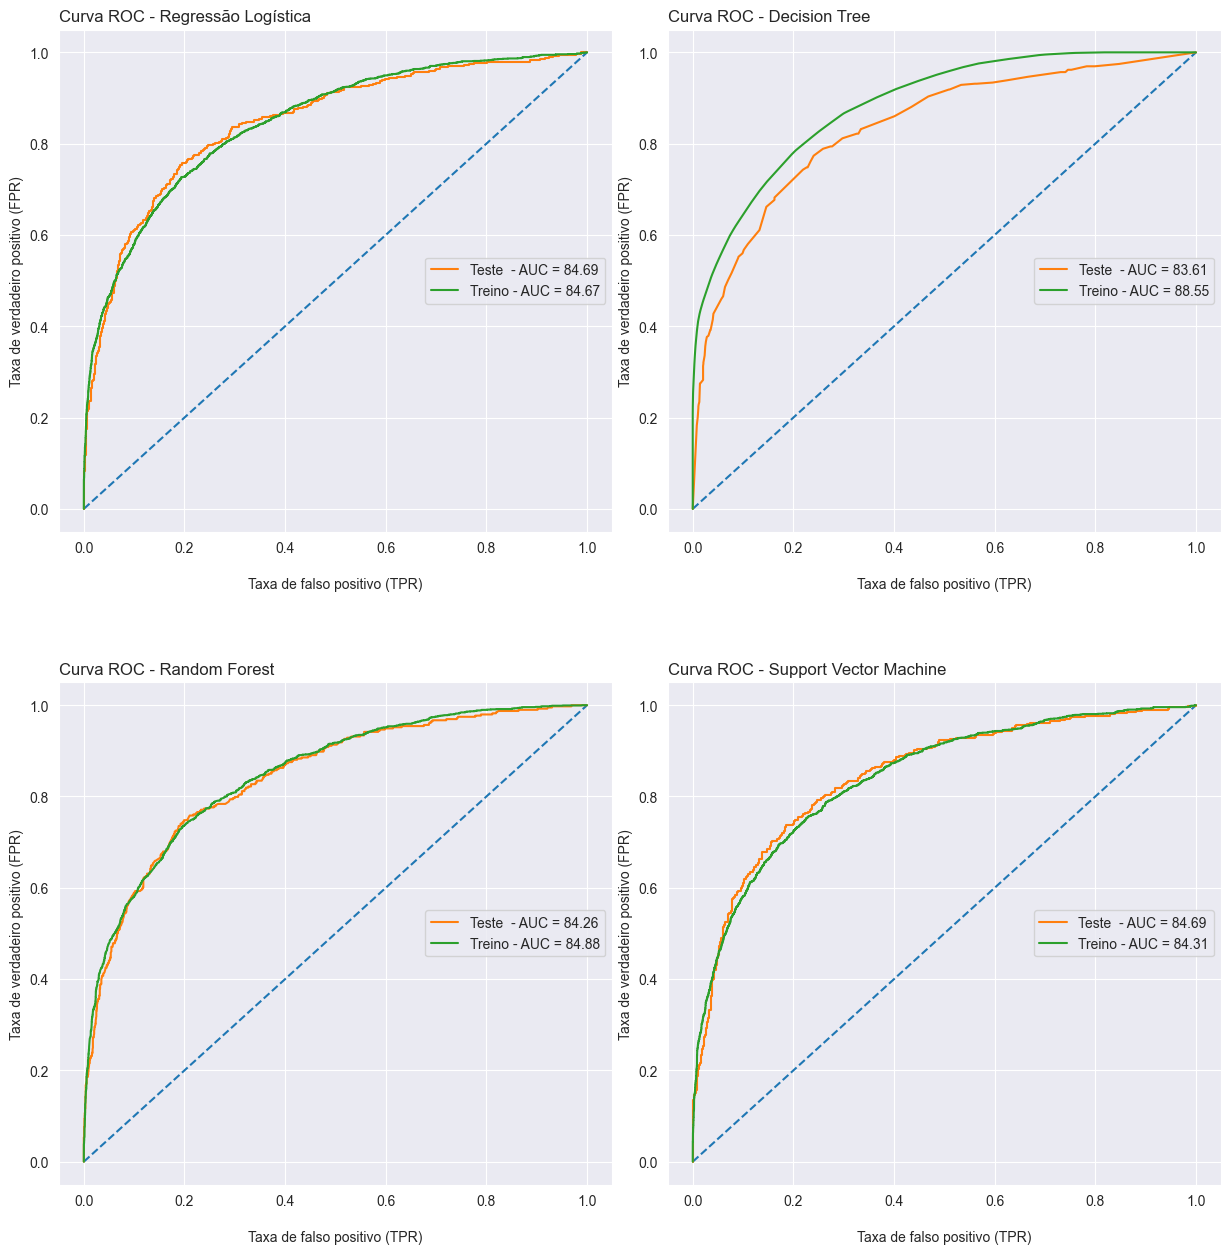

In [187]:
def graf_roc_auc(fpr1, tpr1, fpr2, tpr2, auc1, auc2, title, ax):
    '''
    Função para geração de gráfico curva ROC AUC

    :param fpr1, fpr2: array
        Array de valores que representam a taxa de verdadeiros positivos.
    :param tpr1, tpr2: array
        Array de valores que representam a taxa de falsos positivos.
    :param auc1, auc2: float
        Valor que representa a área da curva.
    :param title: str
        Título dado ao gráfico.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    '''
    ax.plot([0, 1], [0, 1], '--')
    ax.plot(fpr1, tpr1, label='Teste  - AUC = %0.2f' % auc1)
    ax.plot(fpr2, tpr2, label='Treino - AUC = %0.2f' % auc2)
    ax.tick_params(labelsize=10)
    ax.set(xlabel='\nTaxa de falso positivo (TPR)')
    ax.set(ylabel='Taxa de verdadeiro positivo (FPR)')
    ax.set_title(title, loc='left')
    ax.legend(loc='center right', fontsize=10)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

graf_roc_auc(fpr1, tpr1, fpr2, tpr2, auc(fpr1, tpr1)*100,
             auc(fpr2, tpr2)*100, 'Curva ROC - Regressão Logística', ax1)
graf_roc_auc(fpr3, tpr3, fpr4, tpr4, auc(fpr3, tpr3)*100,
             auc(fpr4, tpr4)*100, 'Curva ROC - Decision Tree', ax2)
graf_roc_auc(fpr5, tpr5, fpr6, tpr6, auc(fpr5, tpr5)*100,
             auc(fpr6, tpr6)*100, 'Curva ROC - Random Forest', ax3)
graf_roc_auc(fpr7, tpr7, fpr8, tpr8, auc(fpr7, tpr7)*100,
             auc(fpr8, tpr8)*100, 'Curva ROC - Support Vector Machine', ax4)


plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()


In [188]:
df_logreg = pd.DataFrame(logreg_metrics)
df_dt = pd.DataFrame(dt_metrics)
df_rf = pd.DataFrame(rf_metrics)
df_svm = pd.DataFrame(svm_metrics)
df_metrics = pd.concat([df_logreg, df_dt, df_rf, df_svm])
df_metrics.index = ['Regressão Logística', 'Decision Tree',
                    'Random Forest', 'Support Vector Machine']
df_metrics.T


,Regressão Logística,Decision Tree,Random Forest,Support Vector Machine
Accuracy,77.400,76.700,75.050,76.350
Precision,45.590,44.478,42.598,44.253
Recall,77.608,74.809,77.608,78.372
F1-score,57.439,55.787,55.005,56.566


## 12. Conclusão

**Estes são os principais pontos destacados pela análise:**

Da amostra de dados foi observado que aproximadamente 20,37% (taxa de churn) dos clientes decidiram deixar a instituição bancária.

Entre as características que se destacam no grupo de churn, são clientes, em sua maioria, com score acima de 500 pontos, classificados como 'good'(bom) e 'excellent'(excelente). Embora em outras faixas etárias há perda clientes é entre 45 até 64 anos em que a situação é mais crítica, com perda aproximada de 50% dos clientes dentro dessa faixa. Os clientes que mais deixam a instituição possuem algum saldo bancário, mas têm baixa atividade em suas contas. Aqueles que têm contratado um ou, principalmente, três produtos bancários têm maior probabilidade de churn. 

Entre os três países europeus onde residem os clientes, a Alemanha (Germany) é o que está com a taxa de churn mais elevada, aproximadamente 33%.

**Sobre os algoritmos testados no modelo:**

Dado o contexto, o foco do problema é identificar os clientes que apresentam as características que precedem o encerramento da conta, foi adotado a métrica 'recall' como índice principal de avaliação de eficiência do modelo. Foram testados quatro algoritmos de machine learning: 'Regressão Logística', 'Decision Tree' (Árvore de decisão), 'Random Forest' (Floresta randômica) e 'Support Vector Machine (SVM)' (Máquina de vetores de suporte).

Entre os algoritmos testados, o 'Support Vector Machine' se destacou com um recall de cerca de 78,37%. A métrica AUC (área sob a curva), que avalia de modo geral o desempenho do modelo de classificação, apresentou 84,69% nos dados de teste, ligeiramente superior aos 84,31% nos dados de treino.

**Considerando as características identificadas dos clientes que saíram do banco, sugeri-se as seguintes estratégias de ação:**

Analisar a oferta de produtos para limitar os clientes a, no máximo, dois produtos, reduzindo a complexidade e melhorando a satisfação.

Reavaliar e redesenhar produtos com menor aceitação para torná-los mais atrativos e alinhados às necessidades dos clientes.

Focar em estratégias de marketing direcionadas para clientes com idade acima de 45 anos, com saldo bancário e baixa atividade na conta bancária, oferecendo incentivos como bônus, prêmios, descontos e programas de fidelidade, estes podem auxiliar na retenção de clientes, lembrando que a comunicação deve adequada para este público específico.

Realizar um mapeamento específico para entender as particularidades do mercado alemão, visando reverter a alta taxa de churn.

**Em resumo, a análise revelou informações valiosas para aprimorar a eficácia das estratégias para retenção de clientes. O modelo SVM se mostrou a melhor ferramenta para a previsão de churn com um recall satisfatório, proporcionando uma base para as decisões informadas.**